In [58]:
from torch.utils.data import Dataset
import torch
import numpy as np

class CandidateGridData(Dataset):

    def __init__(self, grid_size, dim):
        self.grid_size = grid_size
        self.dim = dim

    def __len__(self):
        return self.grid_size**self.dim
    
    def __getitem__(self, index):
        state = []
        for dim_i in range(self.dim):
            div = self.grid_size ** (self.dim - dim_i - 1)
            state.append(int(index/div) % self.grid_size)

        return torch.tensor(state)

candidate_set = CandidateGridData(10, 6)

In [62]:
candidate_set[999999]

tensor([9, 9, 9, 9, 9, 9])

In [1]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf
abs_config_dir = os.path.abspath("config/")

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="test_hartmann.yaml", overrides=[])
    print(OmegaConf.to_yaml(config))
    print(config)

config.sampler.conf.logger.do.online = False

dataset:
  grid_size: 10
  normalize_scores: true
  train_fraction: 1.0
  batch_size: 16
  shuffle: true
  train_path: ~/activelearning/my_package/storage/branin/data_100_train.csv
  test_path: null
  _target_: dataset.grid.HartmannDatasetHandler
oracle:
  _target_: oracle.oracle.Hartmann
  fidelity: 1
  do_domain_map: true
filter:
  _target_: filter.filter.ScoreFilter
sampler:
  _target_: my_package.sampler.sampler.RandomSampler
  conf:
    agent:
      random_action_prob: 0.0
      optimizer:
        lr: 0.0005
        n_train_steps: 5000
    logger:
      do:
        online: true
      project_name: test_gflownet
      run_name: identity_lr5e-4
    env:
      length: 10
      cell_min: 0
      cell_max: 0.99
      reward_func: power
      reward_min: 1.0e-08
      reward_beta: 1.0
      reward_norm: 1.0
surrogate:
  _target_: surrogate.surrogate.SingleTaskGPRegressor
user:
  logdir:
    root: activelearning/logs
  data:
    root: activelearning/data
device: cpu
float_precision: 32
b

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'test_hartmann.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [2]:
import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = config.device
n_iterations = config.budget  # TODO: replace with budget
grid_size = config.dataset.grid_size
n_samples = config.n_samples
maximize = config.maximize

from gflownet.utils.common import set_float_precision
float_prec = set_float_precision(config.float_precision)

import matplotlib.colors as cm
import matplotlib.pyplot as plt
# colors = ["red", "blue", "green", "orange", "brown", "pink"]
colors = plt.get_cmap("Reds")

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 9.82 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.41 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=1302.08 for 250 iterations...
Iteration   50, KL divergence 5.9550, 50 iterations in 1.2485 sec
Iteration  100, KL divergence 6.0109, 50 iterations in 1.2434 sec
Iteration  150, KL divergence 6.0001, 50 iterations in 1.2299 sec
Iteration  200, KL divergence 6.0001, 50 iterations in 1.2295 sec
Iteration  250, KL divergence 6.0001, 50 iterations in 1.2315 sec
   --> Time elapsed: 6.18 seconds
===> Running optimization with exaggeration=1.00, lr=15625.00 for 500 it

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 23.0786, 50 iterations in 0.4184 sec
Iteration  100, KL divergence 23.0790, 50 iterations in 0.3964 sec
Iteration  150, KL divergence 23.0790, 50 iterations in 0.3925 sec
Iteration  200, KL divergence 23.0790, 50 iterations in 0.4050 sec
Iteration  250, KL divergence 23.0790, 50 iterations in 0.4046 sec
   --> Time elapsed: 2.02 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 23.3478, 50 iterations in 0.3976 sec
Iteration  100, KL divergence 23.3482, 50 iterations in 0.4086 sec
Iteration  150, KL divergence 23.3482, 50 iterations in 0.3975 sec
Iteration  200, KL divergence 23.3482, 50 iterations in 0.3960 sec
Iteration  250, KL divergence 23.3482, 50 iterations in 0.3954 sec
   --> Time elapsed: 2.00 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 22.9243, 50 iterations in 0.3971 sec
Iteration  100, KL divergence 22.9243, 50 iterations in 0.4738 sec
Iteration  150, KL divergence 22.9243, 50 iterations in 0.3968 sec
Iteration  200, KL divergence 22.9243, 50 iterations in 0.3961 sec
Iteration  250, KL divergence 22.9243, 50 iterations in 0.4058 sec
   --> Time elapsed: 2.07 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 22.3238, 50 iterations in 0.3957 sec
Iteration  100, KL divergence 22.3237, 50 iterations in 0.3980 sec
Iteration  150, KL divergence 22.3237, 50 iterations in 0.3993 sec
Iteration  200, KL divergence 22.3237, 50 iterations in 0.3955 sec
Iteration  250, KL divergence 22.3237, 50 iterations in 0.3961 sec
   --> Time elapsed: 1.98 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 21.3230, 50 iterations in 0.4298 sec
Iteration  100, KL divergence 21.3236, 50 iterations in 0.4121 sec
Iteration  150, KL divergence 21.3236, 50 iterations in 0.4006 sec
Iteration  200, KL divergence 21.3236, 50 iterations in 0.3992 sec
Iteration  250, KL divergence 21.3236, 50 iterations in 0.3991 sec
   --> Time elapsed: 2.04 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 23.5099, 50 iterations in 0.3967 sec
Iteration  100, KL divergence 23.5100, 50 iterations in 0.3966 sec
Iteration  150, KL divergence 23.5100, 50 iterations in 0.3947 sec
Iteration  200, KL divergence 23.5100, 50 iterations in 0.3955 sec
Iteration  250, KL divergence 23.5100, 50 iterations in 0.3931 sec
   --> Time elapsed: 1.98 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 23.0807, 50 iterations in 0.4113 sec
Iteration  100, KL divergence 23.0812, 50 iterations in 0.3962 sec
Iteration  150, KL divergence 23.0812, 50 iterations in 0.3981 sec
Iteration  200, KL divergence 23.0812, 50 iterations in 0.3980 sec
Iteration  250, KL divergence 23.0812, 50 iterations in 0.4104 sec
   --> Time elapsed: 2.01 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 22.0813, 50 iterations in 0.3990 sec
Iteration  100, KL divergence 22.0813, 50 iterations in 0.3982 sec
Iteration  150, KL divergence 22.0813, 50 iterations in 0.3997 sec
Iteration  200, KL divergence 22.0813, 50 iterations in 0.3991 sec
Iteration  250, KL divergence 22.0813, 50 iterations in 0.3977 sec
   --> Time elapsed: 1.99 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 24.2652, 50 iterations in 0.4109 sec
Iteration  100, KL divergence 24.2662, 50 iterations in 0.3975 sec
Iteration  150, KL divergence 24.2662, 50 iterations in 0.3987 sec
Iteration  200, KL divergence 24.2662, 50 iterations in 0.4037 sec
Iteration  250, KL divergence 24.2662, 50 iterations in 0.4003 sec
   --> Time elapsed: 2.01 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 23.5517, 50 iterations in 0.3953 sec
Iteration  100, KL divergence 23.5412, 50 iterations in 0.3960 sec
Iteration  150, KL divergence 23.5413, 50 iterations in 0.3972 sec
Iteration  200, KL divergence 23.5413, 50 iterations in 0.3975 sec
Iteration  250, KL divergence 23.5413, 50 iterations in 0.3965 sec
   --> Time elapsed: 1.98 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, l

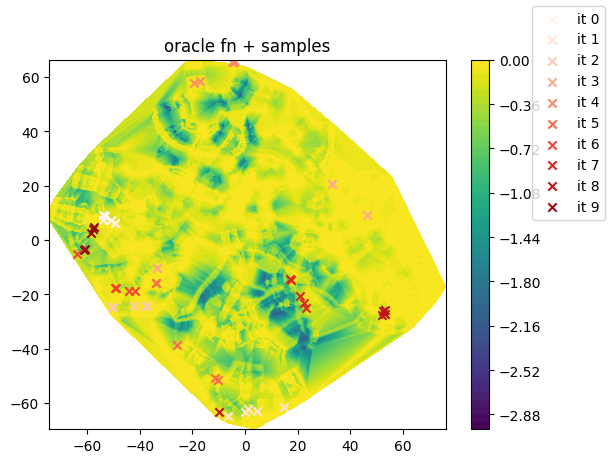

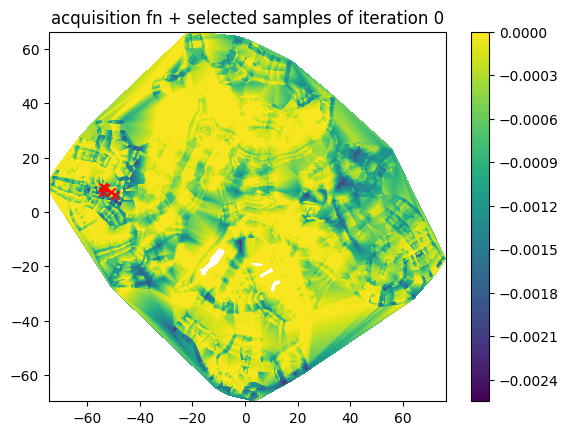

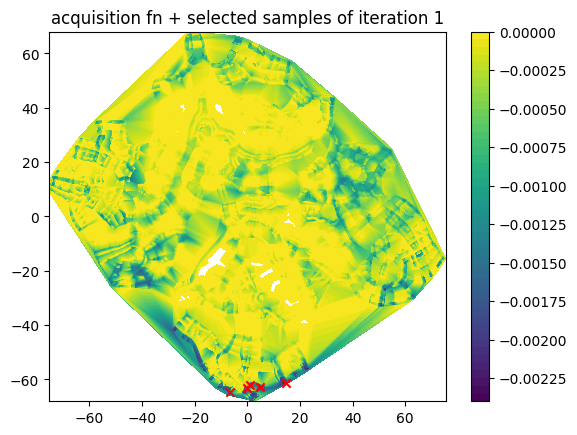

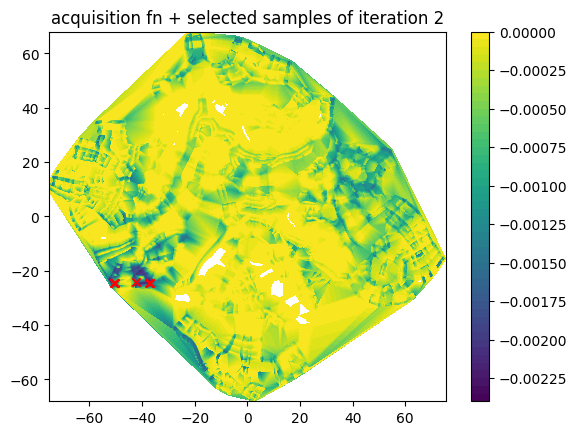

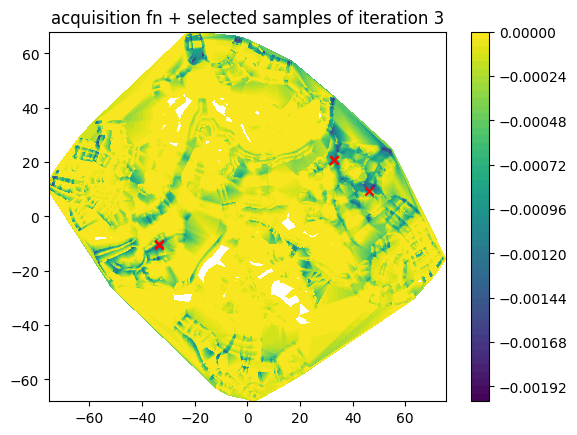

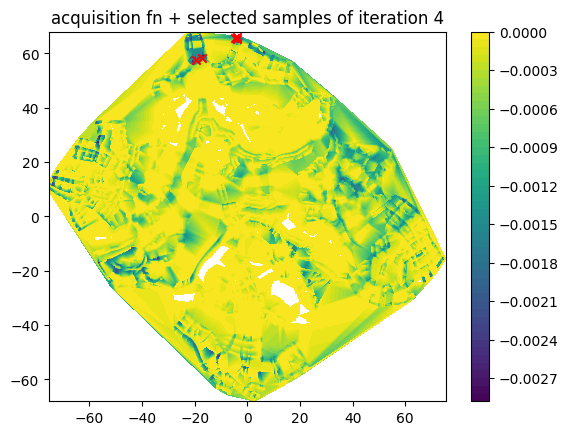

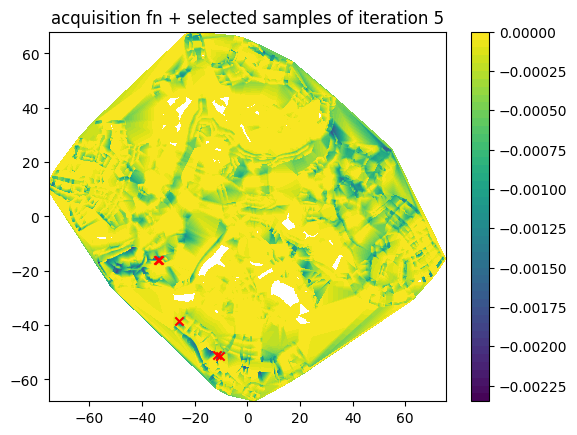

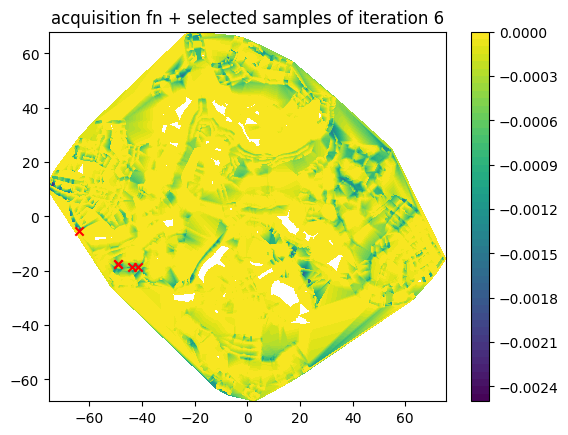

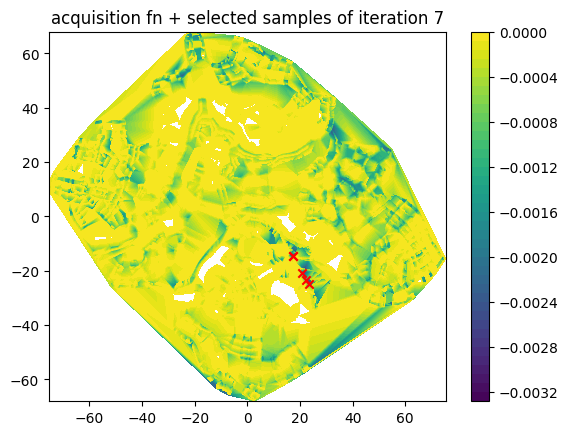

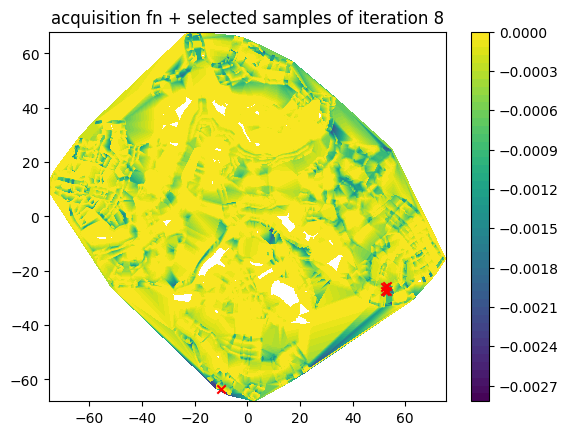

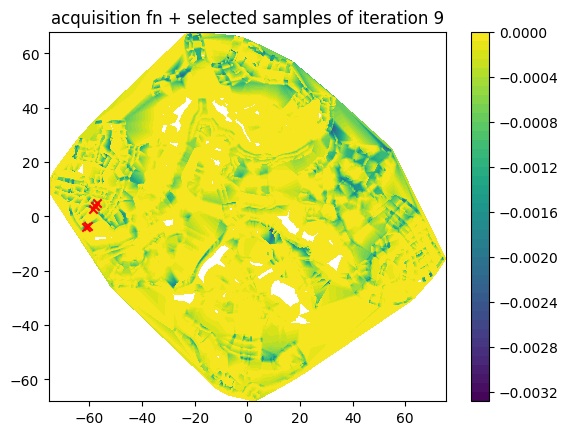

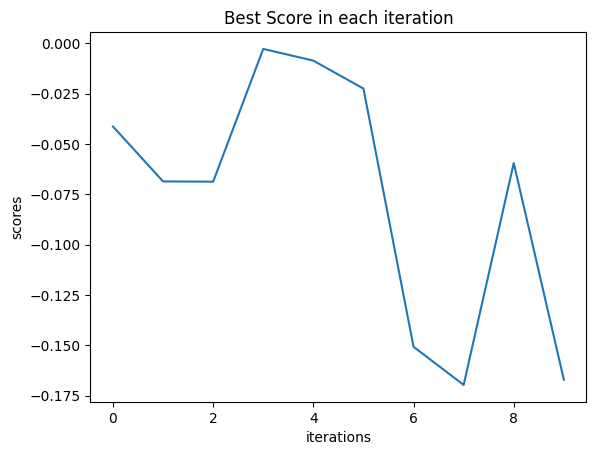

In [3]:
from dataset.grid import HartmannDatasetHandler
from surrogate.surrogate import SingleTaskGPRegressor
from sampler.sampler import GreedySampler, RandomSampler
from filter.filter import Filter, ScoreFilter
from oracle.oracle import HartmannOracle
from utils.logger import WandBLogger
from utils.plotter import ProjectionPlotHelper


# Dataset
dataset_handler = HartmannDatasetHandler(
    grid_size=grid_size,
    train_path="./storage/hartmann/data_train.csv",
    train_fraction=1.0,
    float_precision=float_prec,
)
candidate_set, xi, yi = dataset_handler.get_candidate_set(step=2)

# logger = WandBLogger(project_name="test_hartmann", run_name="GFlowNetSampler 100x100 power")
# plotter = PlotHelper(logger)
# plotter = None #PlotHelper()
plotter = ProjectionPlotHelper(candidate_set)

# Oracle
oracle = HartmannOracle(fidelity=1, device=device, float_precision=float_prec)

if plotter is not None:
    fig_oracle, ax_oracle = plotter.plot_function(oracle)


best_scores = []

for i in range(n_iterations):

    train_data, test_data = dataset_handler.get_dataloader()
    # print("iteration", i)
    # Surrogate (e.g., Bayesian Optimization)
    # starts with a clean slate each iteration
    surrogate = SingleTaskGPRegressor(
        float_precision=float_prec, device=device, maximize=maximize
    )
    surrogate.fit(train_data)

    # Sampler (e.g., GFlowNet, or Random Sampler)
    # also starts with a clean slate; TODO: experiment with NOT training from scratch
    # sampler = RandomSampler(surrogate)
    sampler = GreedySampler(surrogate)
    # sampler = hydra.utils.instantiate(
    #     config.sampler,
    #     surrogate=surrogate,
    #     device=device,
    #     float_precision=float_prec,
    #     _recursive_=False,
    # )

    sampler.fit()  # only necessary for samplers that train a model

    samples = sampler.get_samples(
        n_samples * 3, candidate_set=candidate_set.clone().to(device)
    )

    # Filter
    filter = Filter()
    filtered_samples = filter(n_samples=n_samples, candidate_set=samples.clone())

    if plotter is not None:
        fig_acq, ax_acq = plotter.plot_function(surrogate)
        fig_acq, ax_acq = plotter.plot_samples(filtered_samples, ax_acq, fig_acq)
        ax_acq.set_title("acquisition fn + selected samples of iteration %i" % i)
        plotter.log_figure(fig_acq, "acq")

    if plotter is not None:
        fig_acq, ax_acq = plotter.plot_samples(
            filtered_samples,
            ax_oracle,
            fig_oracle,
            c=cm.to_hex(colors(i / n_iterations)),
            label="it %i" % i,
        )

    del surrogate
    del sampler
    del filter

    scores = oracle(filtered_samples.clone())
    dataset_handler.update_dataset(filtered_samples.cpu(), scores.cpu())
    best_scores.append(scores.min().cpu())

if plotter is not None:
    fig_oracle.legend()
    ax_oracle.set_title("oracle fn + samples")
    plotter.log_figure(fig_oracle, key="oracle")


fig = plt.figure()
plt.plot(best_scores)
plt.xlabel("iterations")
plt.ylabel("scores")
plt.title("Best Score in each iteration")
if plotter is not None:
    plotter.log_figure(fig, key="best_scores")